First notebook file for the project

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from scipy import optimize

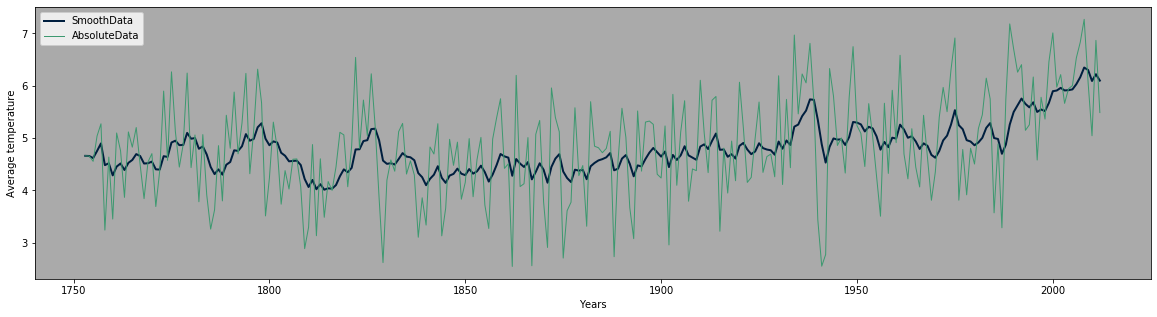

Index(['AverageTemperature'], dtype='object')

In [5]:
#Absolute temperatures, annual readings for Estonia
data_abs_est = pd.read_csv("Estonia.csv",index_col=1, header=0,  parse_dates=True, squeeze=True)
data_est1=data_abs_est.drop(["Unnamed: 0","AverageTemperatureUncertainty","Country"], axis=1)
data_est=data_est1[2:3122]
data_est_year = data_est.groupby([data_est.index.year]).mean()
data_smooth=data_est_year.ewm(com=5).mean()
plt.figure(figsize=(20,5),facecolor=None)
ax=plt.axes()
plt.xlabel('Years')
plt.ylabel('Average temperature')
ax.set_facecolor("#AAAAAA")
plt.plot(data_smooth,"#001f3f",linewidth=2,label="SmoothData")
plt.plot(data_est_year,"#3D9970" ,linewidth=1,label="AbsoluteData")
plt.legend()
plt.savefig('Temps1', dpi=500)
plt.show()

data_smooth.columns






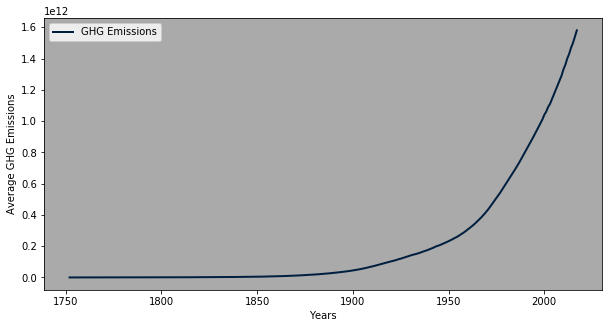

In [3]:
#data_emissions=pd.read_csv("emission data.csv")
#world_emissions1=data_emissions[data_emissions["Country"]=="World"]
#world_emissions2=world_emissions1.transpose()
#world_emissions=world_emissions2[2::]
#a=world_emissions.reset_index()
#a.to_csv("emissions.csv")
data_emissions = pd.read_csv("emissions.csv",index_col=1, header=0)
world_emissions=data_emissions.drop("Unnamed: 0",axis=1)
world_emissions


plt.figure(figsize=(10,5),facecolor="white")
ax=plt.axes()
plt.xlabel('Years')
plt.ylabel('Average GHG Emissions')
ax.set_facecolor("#AAAAAA")
plt.plot(world_emissions,"#001f3f",linewidth=2,label="GHG Emissions")
plt.legend()
plt.savefig('Temps2', dpi=500)
plt.show()





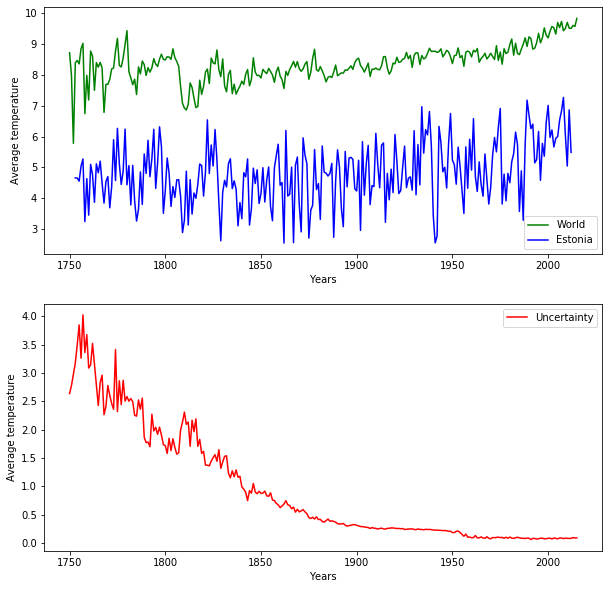

In [6]:
#Absolute temperatures annual global readings
data_absolute=pd.read_csv("GlobalTemperatures.csv",index_col=0, header=0,  parse_dates=True)
data_absolute_1=data_absolute.drop(["LandAverageTemperatureUncertainty","LandMaxTemperature","LandMaxTemperatureUncertainty",
"LandMinTemperature","LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty"],axis=1)
data_absolute_1.head()
data_absolute_2=data_absolute.drop(["LandAverageTemperature","LandMaxTemperature","LandMaxTemperatureUncertainty",
"LandMinTemperature","LandMinTemperatureUncertainty","LandAndOceanAverageTemperature","LandAndOceanAverageTemperatureUncertainty"],axis=1)
data_absolute_year = data_absolute_1.groupby([data_absolute_1.index.year]).mean()
data_absolute_year_uncertainty = data_absolute_2.groupby([data_absolute_1.index.year]).mean()
fig, (ax1,ax2) = plt.subplots(2,figsize=(10,10))
ax1.plot(data_absolute_year,"-g", label="World")
plt.xlabel('Years')
plt.ylabel('Average temperature')
ax1.plot(data_est_year,"-b",label="Estonia")
ax1.legend(loc=4)
ax1.set(xlabel="Years", ylabel="Average temperature")
ax2.plot(data_absolute_year_uncertainty,"-r",label="Uncertainty")
ax2.legend(loc=1)
plt.savefig('Temps3', dpi=500)
plt.show()




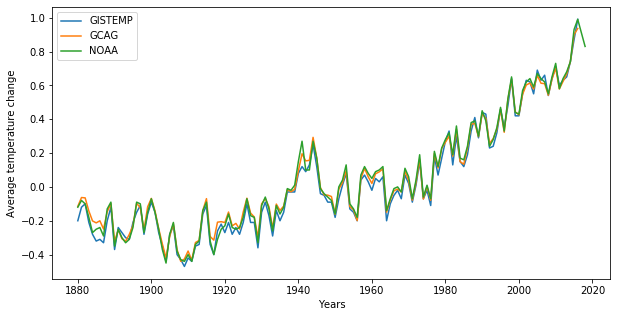

In [5]:
#Temperature variations - temperature readings like these correspond to how different the reading was when compared
#to global average for the years 1900-2000
#Annual readings, 3 dindependent sources: GISTEMP,GCAG and NOAA
var_annual=pd.read_csv("annual_csv.csv",index_col=1, header=0)
data_variations_annual=var_annual.iloc[::-1]
data_variations_annual.head()
data_variations_GISTEMP=data_variations_annual[data_variations_annual["Source"]=="GISTEMP"]
data_variations_GCAG=data_variations_annual[data_variations_annual["Source"]=="GCAG"]
data_variations_NOAA=pd.read_csv("data-NOAA.csv",index_col=0, header=0)
data_var_GISTEMP=data_variations_GISTEMP.drop("Source",axis=1)
data_var_GCAG=data_variations_GCAG.drop("Source",axis=1)


plt.figure(figsize=(10,5))
plt.plot(data_var_GISTEMP,label="GISTEMP")
plt.plot(data_var_GCAG,label="GCAG")
plt.plot(data_variations_NOAA,label="NOAA")
plt.xlabel('Years')
plt.ylabel('Average temperature change')
plt.legend()
plt.savefig('Temps5', dpi=500)
plt.show()


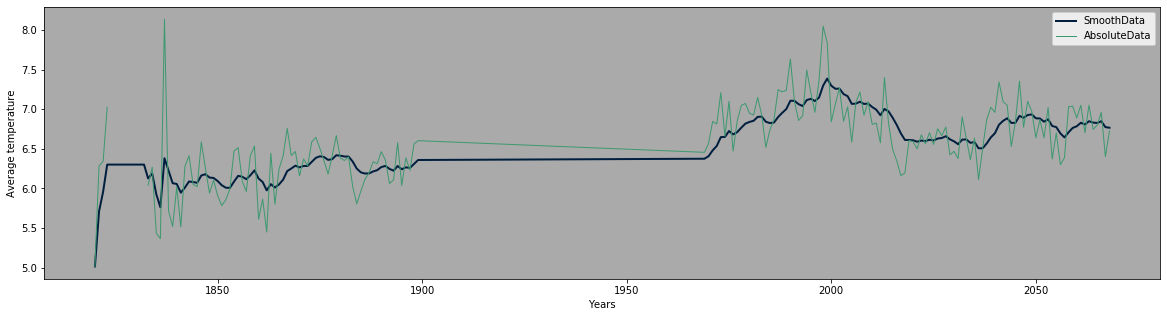

In [12]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv", index_col=0, header=0,  parse_dates=True, squeeze=True)
china=df[(df.Country == 'China')]
china=china.drop("AverageTemperatureUncertainty", axis=1)
data_chi_year = china.groupby([china.index.year]).mean()
data_smooth=data_chi_year.ewm(com=5).mean()
plt.figure(figsize=(20,5),facecolor=None)
ax=plt.axes()
plt.xlabel('Years')
plt.ylabel('Average temperature')
ax.set_facecolor("#AAAAAA")
plt.plot(data_smooth,"#001f3f",linewidth=2,label="SmoothData")
plt.plot(data_chi_year,"#3D9970" ,linewidth=1,label="AbsoluteData")
plt.legend()
plt.show()


